## Table of Contents

#### 1) Importing the Dataset 
#### 2) Data Cleaning 
#### 3) Data Preparation
#### 4) Exploratory Data Analysis
#### 5) Train and Test Data
#### 6) Model Building
#### 7) Predictions and Results

## Importing the Dataset

In [4]:
ipl = read.csv('IPL Data.csv', stringsAsFactors = TRUE)

In [5]:
head(ipl)

id,city,Season,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,playoff,team1.IPL_titles,team2.IPL_titles,team1_captain.change,team2_captain.change,umpire1,umpire2
335982,Bangalore,2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,0,0,0,0,0,Asad Rauf,RE Koertzen
335983,Chandigarh,2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,0,0,0,0,0,MR Benson,SL Shastri
335984,Delhi,2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,0,0,0,0,0,Aleem Dar,GA Pratapkumar
335985,Mumbai,2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,0,0,0,0,0,SJ Davis,DJ Harper
335986,Kolkata,2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,0,0,0,0,0,BF Bowden,K Hariharan
335987,Jaipur,2008,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6,0,0,0,0,0,Aleem Dar,RB Tiffin


In [6]:
str(ipl)

'data.frame':	812 obs. of  20 variables:
 $ id                  : int  335982 335983 335984 335985 335986 335987 335988 335989 335990 335991 ...
 $ city                : Factor w/ 33 levels "","Abu Dhabi",..: 4 9 12 25 24 19 17 10 17 9 ...
 $ Season              : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ player_of_match     : Factor w/ 233 levels "A Chandila","A Kumble",..: 31 126 127 146 49 213 225 133 230 94 ...
 $ venue               : Factor w/ 35 levels "Barabati Stadium",..: 15 23 9 35 8 27 24 16 24 23 ...
 $ neutral_venue       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ team1               : Factor w/ 15 levels "Chennai Super Kings",..: 14 6 4 9 8 11 2 1 2 6 ...
 $ team2               : Factor w/ 15 levels "Chennai Super Kings",..: 8 1 11 14 2 6 4 9 11 9 ...
 $ toss_winner         : Factor w/ 15 levels "Chennai Super Kings",..: 14 1 11 9 2 6 2 9 11 9 ...
 $ toss_decision       : Factor w/ 2 levels "bat","field": 2 1 1 1 1 1 1 2 2 2 ...
 $ winner              : Factor

In [7]:
summary(ipl)

       id                 city         Season           player_of_match
 Min.   : 335982   Mumbai   :101   Min.   :2008   AB de Villiers: 23   
 1st Qu.: 501227   Kolkata  : 77   1st Qu.:2011   CH Gayle      : 22   
 Median : 729296   Delhi    : 73   Median :2014   RG Sharma     : 18   
 Mean   : 755963   Hyderabad: 64   Mean   :2014   DA Warner     : 17   
 3rd Qu.:1082626   Bangalore: 63   3rd Qu.:2017   MS Dhoni      : 17   
 Max.   :1237181   Chennai  : 57   Max.   :2020   SR Watson     : 16   
                   (Other)  :377                  (Other)       :699   
                                       venue     neutral_venue   
 Eden Gardens                             : 77   Min.   :0.0000  
 M Chinnaswamy Stadium                    : 77   1st Qu.:0.0000  
 Feroz Shah Kotla                         : 73   Median :0.0000  
 Wankhede Stadium                         : 73   Mean   :0.3042  
 Rajiv Gandhi International Stadium, Uppal: 64   3rd Qu.:1.0000  
 MA Chidambaram Stadium, Che

In [8]:
any(is.na(ipl))

[1] TRUE

In [9]:
sum(is.na(ipl))

[1] 13

## Importing the Prerequisite Libraries

In [10]:
library(ggplot2)
library(dplyr)

In [11]:
ipl %>% filter(result == 'tie')  %>% select(city, Season, venue, team1, team2, winner, result, result_margin)


city,Season,venue,team1,team2,winner,result,result_margin
Cape Town,2009,Newlands,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,tie,NA
Chennai,2010,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,tie,NA
Hyderabad,2013,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,tie,NA
Bangalore,2013,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,tie,NA
Abu Dhabi,2014,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,tie,NA
Ahmedabad,2015,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,tie,NA
Rajkot,2017,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Mumbai Indians,tie,NA
Delhi,2019,Feroz Shah Kotla,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,tie,NA
Mumbai,2019,Wankhede Stadium,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,tie,NA
Dubai,2020,Dubai International Cricket Stadium,Delhi Capitals,Kings XI Punjab,Delhi Capitals,tie,NA


### When the result of the match was a tie, the result margin_margin column is  the margin as a NA. Tecnically the margin should be zero since no the scores were equal.


## Converting NA values of result_margin column as zero


In [12]:
ipl$result_margin[is.na(ipl$result_margin)] = 0

In [13]:
ipl %>% filter(result == 'tie')  %>% select(city, Season, venue, winner, result, result_margin)

city,Season,venue,winner,result,result_margin
Cape Town,2009,Newlands,Rajasthan Royals,tie,0
Chennai,2010,"MA Chidambaram Stadium, Chepauk",Kings XI Punjab,tie,0
Hyderabad,2013,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,tie,0
Bangalore,2013,M Chinnaswamy Stadium,Royal Challengers Bangalore,tie,0
Abu Dhabi,2014,Sheikh Zayed Stadium,Rajasthan Royals,tie,0
Ahmedabad,2015,"Sardar Patel Stadium, Motera",Kings XI Punjab,tie,0
Rajkot,2017,Saurashtra Cricket Association Stadium,Mumbai Indians,tie,0
Delhi,2019,Feroz Shah Kotla,Delhi Capitals,tie,0
Mumbai,2019,Wankhede Stadium,Mumbai Indians,tie,0
Dubai,2020,Dubai International Cricket Stadium,Delhi Capitals,tie,0


## Data Preparation

In [14]:
table(ipl$winner)


        Chennai Super Kings             Deccan Chargers 
                        106                          29 
             Delhi Capitals            Delhi Daredevils 
                         19                          67 
              Gujarat Lions             Kings XI Punjab 
                         13                          88 
       Kochi Tuskers Kerala       Kolkata Knight Riders 
                          6                          99 
             Mumbai Indians               Pune Warriors 
                        120                          12 
           Rajasthan Royals      Rising Pune Supergiant 
                         81                          10 
    Rising Pune Supergiants Royal Challengers Bangalore 
                          5                          91 
        Sunrisers Hyderabad 
                         66 

### Due to change in ownership Deccan Chargers was renamed to Sunrisers Hyderabad  but I am not considering those two as separate teams since both DC and SRH had same players in 2012 and 2013 only the name and jersey in changed. Same case with Delhi Capitals and Delhi Daredevils

In [15]:
ipl[ipl == 'Deccan Chargers'] = 'Sunrisers Hyderabad'

ipl[ipl == 'Delhi Daredevils'] = 'Delhi Capitals'

ipl[ipl == 'Rising Pune Supergiant'] = 'Rising Pune Supergiants'

In [16]:
table(ipl$winner)


        Chennai Super Kings             Deccan Chargers 
                        106                           0 
             Delhi Capitals            Delhi Daredevils 
                         86                           0 
              Gujarat Lions             Kings XI Punjab 
                         13                          88 
       Kochi Tuskers Kerala       Kolkata Knight Riders 
                          6                          99 
             Mumbai Indians               Pune Warriors 
                        120                          12 
           Rajasthan Royals      Rising Pune Supergiant 
                         81                           0 
    Rising Pune Supergiants Royal Challengers Bangalore 
                         15                          91 
        Sunrisers Hyderabad 
                         95 

## Replacing Bengaluru with Bangalore

In [17]:
table(ipl$city)


                    Abu Dhabi      Ahmedabad      Bangalore      Bengaluru 
             1             29             12             63             14 
  Bloemfontein      Cape Town      Centurion     Chandigarh        Chennai 
             2              7             12             56             57 
       Cuttack          Delhi     Dharamsala          Dubai         Durban 
             7             73              9             33             15 
   East London      Hyderabad         Indore         Jaipur   Johannesburg 
             3             64              9             47              8 
        Kanpur      Kimberley          Kochi        Kolkata         Mumbai 
             4              3              5             77            101 
        Nagpur Port Elizabeth           Pune         Raipur         Rajkot 
             3              7             38              6             10 
        Ranchi        Sharjah  Visakhapatnam 
             7             17            

In [18]:
ipl[ipl == 'Bengaluru'] = 'Bangalore'


In [19]:
table(ipl$city)


                    Abu Dhabi      Ahmedabad      Bangalore      Bengaluru 
             1             29             12             77              0 
  Bloemfontein      Cape Town      Centurion     Chandigarh        Chennai 
             2              7             12             56             57 
       Cuttack          Delhi     Dharamsala          Dubai         Durban 
             7             73              9             33             15 
   East London      Hyderabad         Indore         Jaipur   Johannesburg 
             3             64              9             47              8 
        Kanpur      Kimberley          Kochi        Kolkata         Mumbai 
             4              3              5             77            101 
        Nagpur Port Elizabeth           Pune         Raipur         Rajkot 
             3              7             38              6             10 
        Ranchi        Sharjah  Visakhapatnam 
             7             17            

## Few years ago PCA Stadium, Mohali was renamed to PCA IS Bindra Stadium, Mohali and Subrata Roy Sahara Stadium to Maharashtra Cricket Association Stadium

In [20]:
table(ipl$venue)


                                    Barabati Stadium 
                                                   7 
                                   Brabourne Stadium 
                                                  11 
                                        Buffalo Park 
                                                   3 
                               De Beers Diamond Oval 
                                                   3 
                          Dr DY Patil Sports Academy 
                                                  17 
 Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium 
                                                  13 
                 Dubai International Cricket Stadium 
                                                  33 
                                        Eden Gardens 
                                                  77 
                                    Feroz Shah Kotla 
                                                  73 
                           

In [21]:
ipl[ipl == 'Punjab Cricket Association IS Bindra Stadium, Mohali'] = 
  'Punjab Cricket Association Stadium, Mohali'

ipl[ipl == 'Subrata Roy Sahara Stadium'] = 'Maharashtra Cricket Association Stadium'

In [22]:
table(ipl$venue)  


                                    Barabati Stadium 
                                                   7 
                                   Brabourne Stadium 
                                                  11 
                                        Buffalo Park 
                                                   3 
                               De Beers Diamond Oval 
                                                   3 
                          Dr DY Patil Sports Academy 
                                                  17 
 Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium 
                                                  13 
                 Dubai International Cricket Stadium 
                                                  33 
                                        Eden Gardens 
                                                  77 
                                    Feroz Shah Kotla 
                                                  73 
                           

## Exploratory Data Analysis

### Most Matches Won 

In [23]:
wins.most = ipl %>% group_by(winner) %>% 
  summarise(Wins = n()) %>% arrange(desc(Wins))

wins.most

wins.most = wins.most[1:8,  ]  

wins.most

winner,Wins
Mumbai Indians,120
Chennai Super Kings,106
Kolkata Knight Riders,99
Sunrisers Hyderabad,95
Royal Challengers Bangalore,91
Kings XI Punjab,88
Delhi Capitals,86
Rajasthan Royals,81
Rising Pune Supergiants,15
Gujarat Lions,13


winner,Wins
Mumbai Indians,120
Chennai Super Kings,106
Kolkata Knight Riders,99
Sunrisers Hyderabad,95
Royal Challengers Bangalore,91
Kings XI Punjab,88
Delhi Capitals,86
Rajasthan Royals,81


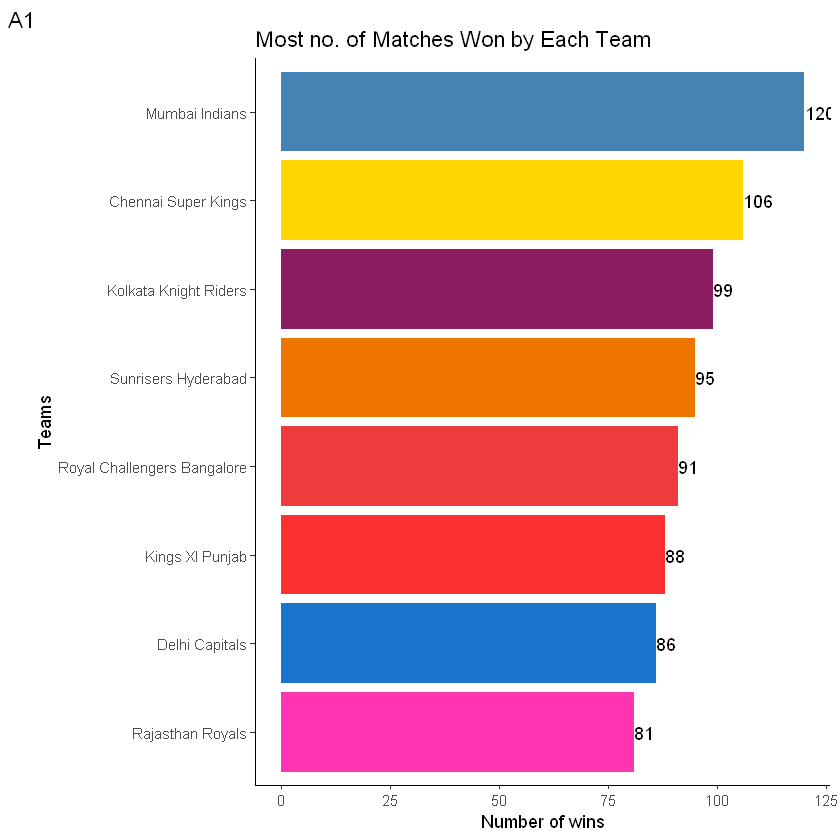

In [35]:
ggplot(wins.most, aes(reorder(winner, Wins),Wins, fill = winner ))+ theme_classic()+
  geom_bar(stat = 'identity') + geom_text(aes(label = Wins, hjust = -0.01))+
  labs(title = 'Most no. of Matches Won by Each Team', x = 'Teams',
       y = 'Number of wins', tag = 'A1')+
  theme(legend.position = 'none')+ coord_flip() +
  scale_fill_manual(values = c('Mumbai Indians' = 'steelblue',
                   'Chennai Super Kings' = 'gold', 'Kolkata Knight Riders' = 'maroon4',
                               'Sunrisers Hyderabad' = 'darkorange2', 
               'Royal Challengers Bangalore'= 'brown2', 'Kings XI Punjab'='firebrick1',
                    'Delhi Capitals' = 'dodgerblue3', 'Rajasthan Royals' = 'maroon1'))
  

### Most Wins After Batting First

In [28]:
bat.first.wins = ipl %>% group_by(winner) %>% 
  filter(result == 'runs') %>% 
  summarise(Wins = n())

bat.first.wins = bat.first.wins[-c(3,5,8,10), ]

bat.first.wins

winner,Wins
Chennai Super Kings,53
Delhi Capitals,34
Kings XI Punjab,40
Kolkata Knight Riders,41
Mumbai Indians,62
Rajasthan Royals,28
Royal Challengers Bangalore,38
Sunrisers Hyderabad,52


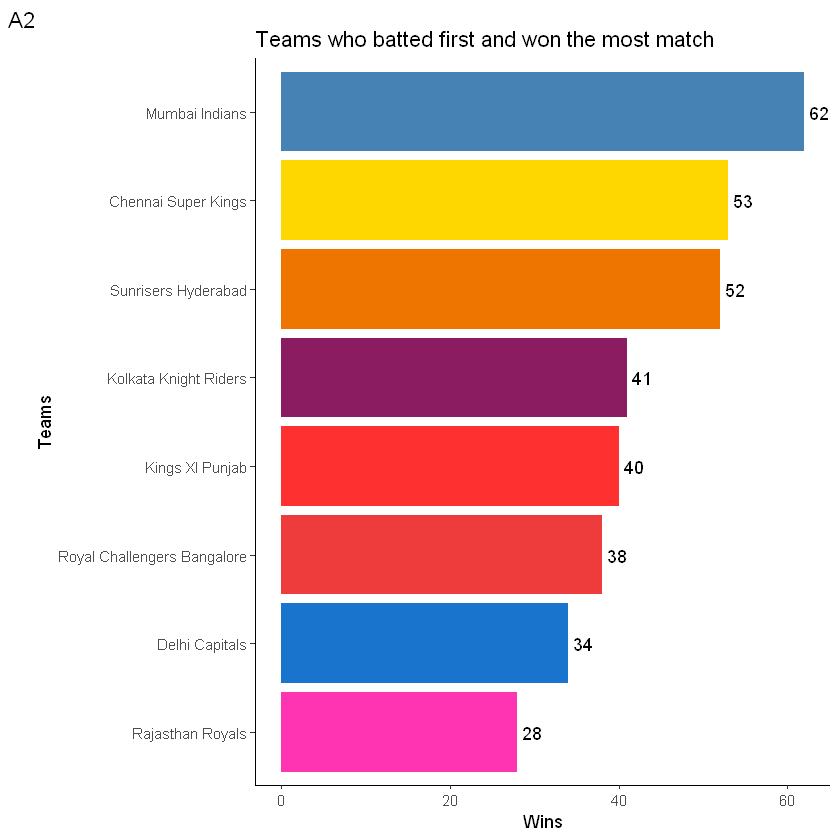

In [36]:
ggplot(bat.first.wins, aes( reorder(winner, Wins), Wins, fill = winner)) +
  theme_classic()+
  geom_bar(stat = 'identity')+ geom_text(aes(label = Wins, hjust = -0.25))+
  labs(title = 'Teams who batted first and won the most match',x = 'Teams', y = 'Wins',
        tag = 'A2') + coord_flip()+
  theme(legend.position = 'none')+
  scale_fill_manual(values = c('Mumbai Indians' = 'steelblue',
                               'Chennai Super Kings' = 'gold', 'Kolkata Knight Riders' = 'maroon4',
                               'Sunrisers Hyderabad' = 'darkorange2', 
                               'Royal Challengers Bangalore'= 'brown2', 'Kings XI Punjab'='firebrick1',
                               'Delhi Capitals' = 'dodgerblue3', 'Rajasthan Royals' = 'maroon1'))


### Most Wins Chasing the Target

In [31]:
bat.second.wins = ipl %>% group_by(winner) %>% 
  filter(result == 'wickets') %>% 
  summarise(Wins = n())

bat.second.wins = bat.second.wins[ -c(3,5,8,10), ]

bat.second.wins

winner,Wins
Chennai Super Kings,53
Delhi Capitals,50
Kings XI Punjab,45
Kolkata Knight Riders,57
Mumbai Indians,56
Rajasthan Royals,51
Royal Challengers Bangalore,51
Sunrisers Hyderabad,42


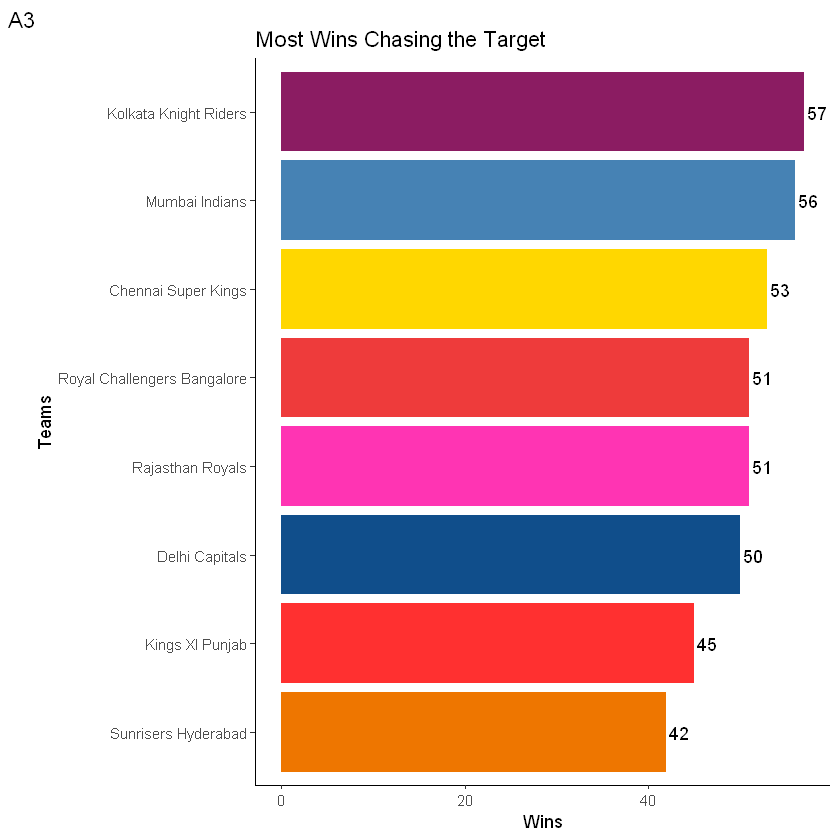

In [37]:
ggplot(bat.second.wins, aes(reorder(winner, Wins), Wins, fill = winner)) + 
  theme_classic()+ theme(legend.position = 'none')+
  geom_bar(stat = 'identity')+ geom_text(aes(label = Wins, hjust = -0.15))+
  labs(title = 'Most Wins Chasing the Target', x = 'Teams', y = 'Wins', tag = 'A3') + coord_flip()+
  scale_fill_manual(values = c('Mumbai Indians' = 'steelblue',
                               'Chennai Super Kings' = 'gold', 'Kolkata Knight Riders' = 'maroon4',
                               'Sunrisers Hyderabad' = 'darkorange2', 
                               'Royal Challengers Bangalore'= 'brown2', 'Kings XI Punjab'='firebrick1',
                               'Delhi Capitals' = 'dodgerblue4', 'Rajasthan Royals' = 'maroon1'))

### Cities which hosted maximum matches

In [34]:
top.city =  ipl %>% group_by(city) %>% 
  summarise(Matches = n()) %>% arrange(desc(Matches))

top.city = top.city[1:10, ]

top.city

city,Matches
Mumbai,101
Bangalore,77
Kolkata,77
Delhi,73
Hyderabad,64
Chennai,57
Chandigarh,56
Jaipur,47
Pune,38
Dubai,33


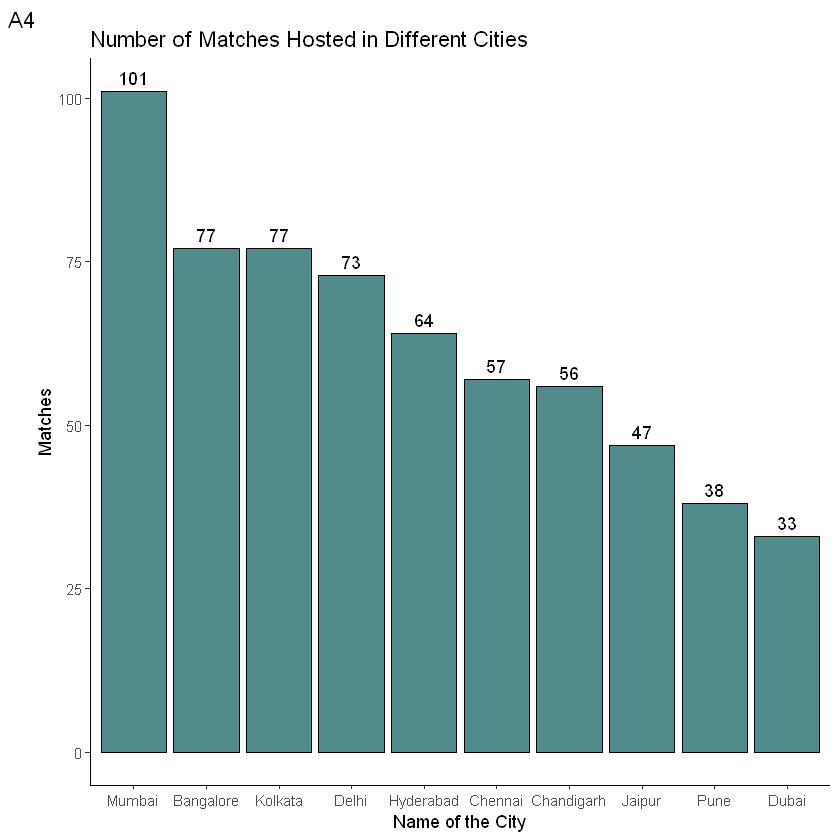

In [38]:
ggplot(top.city, aes(reorder(city, -Matches), Matches)) + theme_classic()+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+ 
  theme(legend.position = 'none') +
  geom_text(aes(label = Matches, vjust = -0.5))+
  labs(title = 'Number of Matches Hosted in Different Cities',
       x = 'Name of the City', tag = 'A4')

### Stadiums that hosted maximum matches

In [39]:
top.stadiums = ipl %>% group_by(venue) %>% 
  summarise(Matches.played = n()) %>% arrange(desc(Matches.played))

top.stadiums = top.stadiums[1:10, ]

top.stadiums

venue,Matches.played
Eden Gardens,77
M Chinnaswamy Stadium,77
Feroz Shah Kotla,73
Wankhede Stadium,73
"Rajiv Gandhi International Stadium, Uppal",64
"MA Chidambaram Stadium, Chepauk",57
"Punjab Cricket Association Stadium, Mohali",56
Sawai Mansingh Stadium,47
Maharashtra Cricket Association Stadium,38
Dubai International Cricket Stadium,33


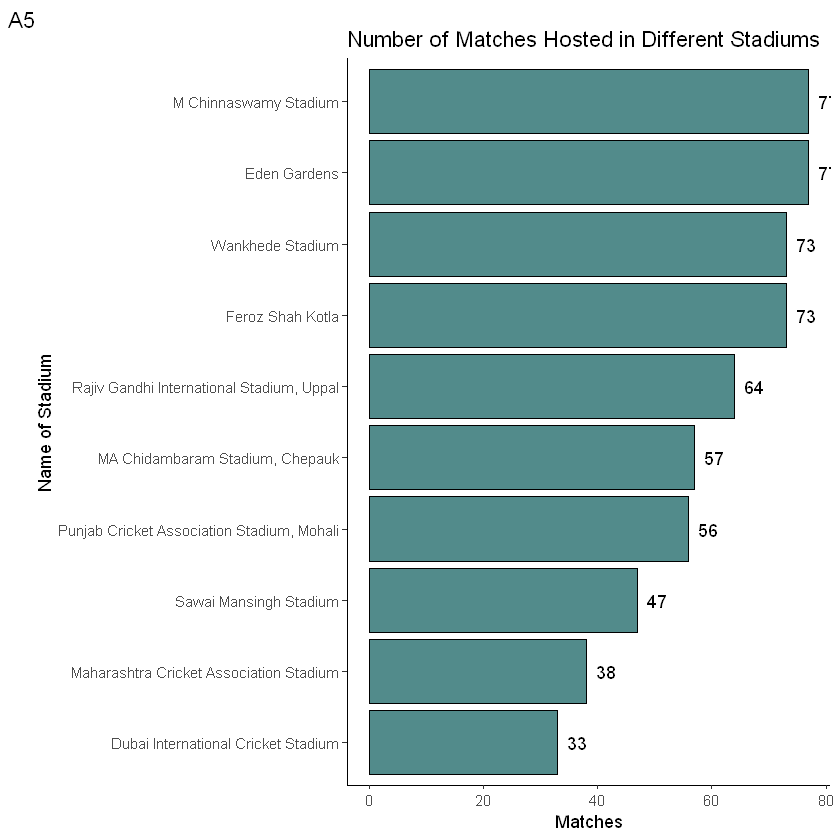

In [40]:
ggplot(top.stadiums, aes(reorder(venue, Matches.played),Matches.played)) + 
  theme_classic()+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  coord_flip() + theme(legend.position = 'none')+
  geom_text(aes(label = Matches.played, hjust = -0.5))+
  labs(title = 'Number of Matches Hosted in Different Stadiums', y = 'Matches',
       x = 'Name of Stadium',  tag = 'A5')

## Box Plots for Wins by Runs and Wickets

In [43]:
win.runs = ipl %>% filter(result == 'runs') %>% 
  filter(winner != 'Kochi Tuskers Kerala') %>% 
  filter(winner != 'Gujarat Lions') %>% 
  filter(winner != 'Pune Warriors') %>% 
  filter(winner != 'Rising Pune Supergiants')

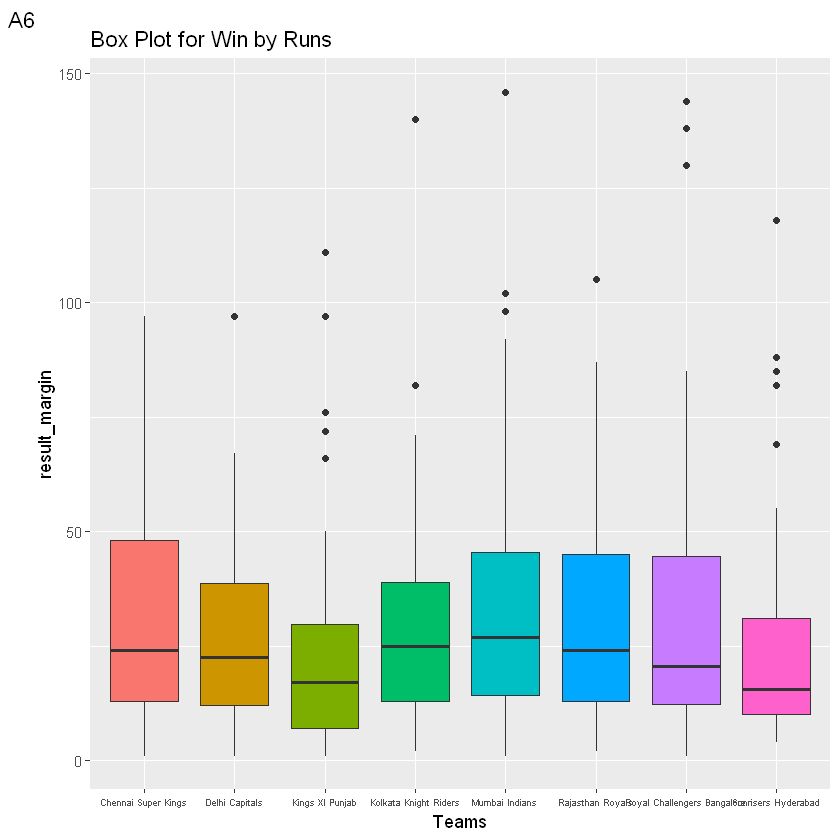

In [53]:
ggplot(win.runs, aes(x = winner, y = result_margin, fill = winner)) + 
  geom_boxplot() + theme(legend.position = 'none', axis.text.x = element_text(size = 5.5)) +
  labs( x = 'Teams', title = 'Box Plot for Win by Runs', tag = 'A6')

In [50]:
win.wks = ipl %>% filter(result == 'wickets') %>% 
  filter(winner != 'Kochi Tuskers Kerala') %>% 
  filter(winner != 'Gujarat Lions') %>% 
  filter(winner != 'Pune Warriors') %>% 
  filter(winner != 'Rising Pune Supergiants')

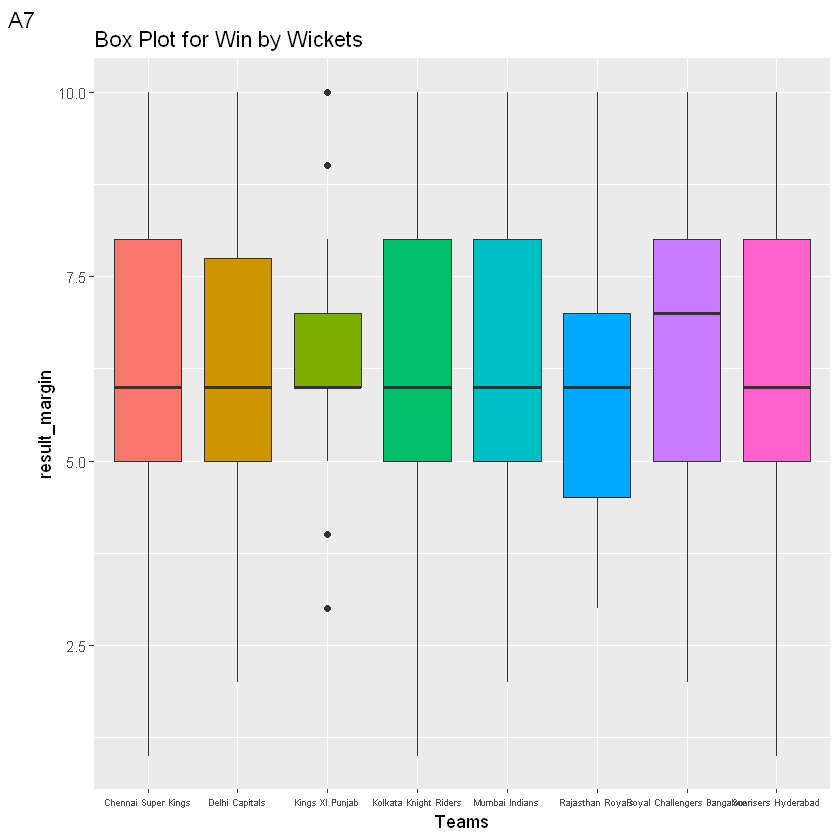

In [55]:
ggplot(win.wks, aes(x = winner, y = result_margin, fill = winner))+
  geom_boxplot() +  theme(legend.position = 'none', axis.text.x = element_text(size = 5.5))+
  labs( x = 'Teams', title = 'Box Plot for Win by Wickets', tag = 'A7')

## Train and Test Data

### removing the unneccessary columns

In [20]:
names(ipl)

[1] "id"                   "city"                 "Season"              
 [4] "player_of_match"      "venue"                "neutral_venue"       
 [7] "team1"                "team2"                "toss_winner"         
[10] "toss_decision"        "winner"               "result"              
[13] "result_margin"        "playoff"              "team1.IPL_titles"    
[16] "team2.IPL_titles"     "team1_captain.change" "team2_captain.change"
[19] "umpire1"              "umpire2"

In [21]:
ipl = select(ipl, -c(id,Season, player_of_match))

In [22]:
names(ipl)

[1] "city"                 "venue"                "neutral_venue"       
 [4] "team1"                "team2"                "toss_winner"         
 [7] "toss_decision"        "winner"               "result"              
[10] "result_margin"        "playoff"              "team1.IPL_titles"    
[13] "team2.IPL_titles"     "team1_captain.change" "team2_captain.change"
[16] "umpire1"              "umpire2"

In [34]:
df = read.csv('ipl_matches.csv', stringsAsFactors = T)

In [36]:
df = select(df, -c(id,Season, player_of_match))

In [37]:
train = df[1:633, ]

test = df[634:812, ]

## Training the model under random forest method

In [26]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [38]:
ipl.rf = randomForest(winner~., data = train, importance = TRUE, ntree = 2001)

In [39]:
ipl.rf


Call:
 randomForest(formula = winner ~ ., data = train, importance = TRUE,      ntree = 2001) 
               Type of random forest: classification
                     Number of trees: 2001
No. of variables tried at each split: 4

        OOB estimate of  error rate: 24.33%
Confusion matrix:
                            Chennai Super Kings Delhi Capitals Gujarat Lions
Chennai Super Kings                          64              2             0
Delhi Capitals                                2             41             0
Gujarat Lions                                 0              1             8
Kings XI Punjab                               5              2             0
Kochi Tuskers Kerala                          0              0             0
Kolkata Knight Riders                         3              1             0
Mumbai Indians                                3              1             1
Pune Warriors                                 2              1             0
Rajasthan Ro

## Accurracy: 75 % 

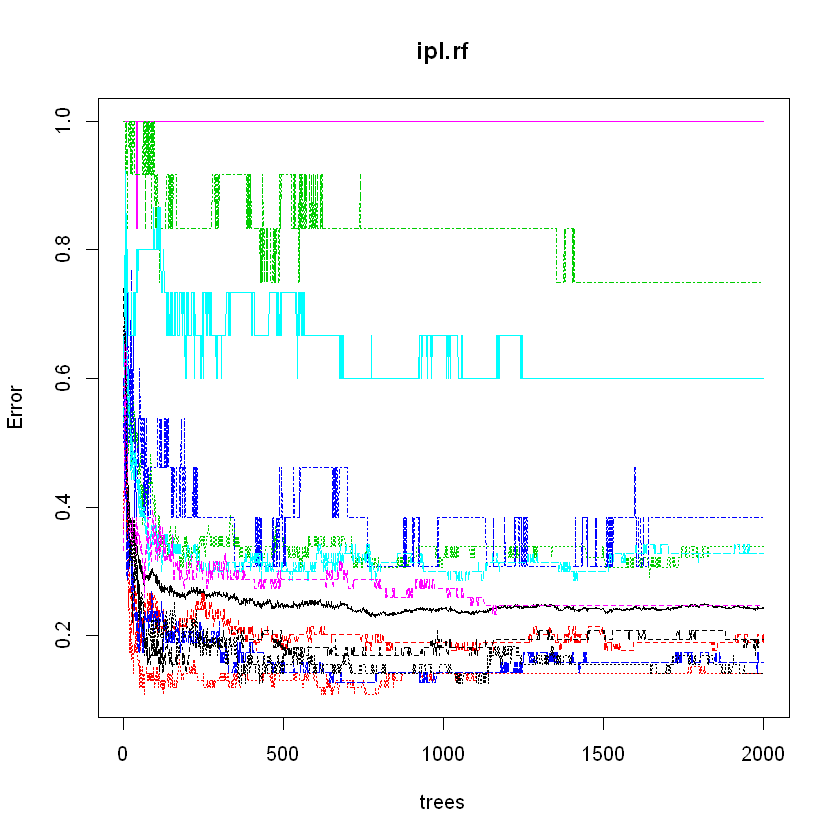

In [40]:
plot(ipl.rf)

## Predictions

In [53]:
result = data.frame(test$winner, predict(ipl.rf, test[,-c(9)], 
                                         type = 'response'))

## Checking the results

In [54]:
head(result,10)

,test.winner,predict.ipl.rf..test....c.9....type....response..
634,Chennai Super Kings,Chennai Super Kings
635,Kings XI Punjab,Kings XI Punjab
636,Kolkata Knight Riders,Kolkata Knight Riders
637,Sunrisers Hyderabad,Sunrisers Hyderabad
638,Chennai Super Kings,Chennai Super Kings
639,Rajasthan Royals,Rajasthan Royals
640,Sunrisers Hyderabad,Sunrisers Hyderabad
641,Royal Challengers Bangalore,Royal Challengers Bangalore
642,Delhi Capitals,Mumbai Indians
643,Sunrisers Hyderabad,Kolkata Knight Riders


In [59]:
my.pred = rename(result, Actual_Winner = test.winner)

In [63]:
my.pred = rename(result, Predicted_winner = 
                   predict.ipl.rf..test....c.9....type....response..)

In [64]:
head(my.pred,10)

,test.winner,Predicted_winner
634,Chennai Super Kings,Chennai Super Kings
635,Kings XI Punjab,Kings XI Punjab
636,Kolkata Knight Riders,Kolkata Knight Riders
637,Sunrisers Hyderabad,Sunrisers Hyderabad
638,Chennai Super Kings,Chennai Super Kings
639,Rajasthan Royals,Rajasthan Royals
640,Sunrisers Hyderabad,Sunrisers Hyderabad
641,Royal Challengers Bangalore,Royal Challengers Bangalore
642,Delhi Capitals,Mumbai Indians
643,Sunrisers Hyderabad,Kolkata Knight Riders


In [65]:
tail(my.pred,10)

,test.winner,Predicted_winner
803,Sunrisers Hyderabad,Sunrisers Hyderabad
804,Delhi Capitals,Delhi Capitals
805,Chennai Super Kings,Chennai Super Kings
806,Kolkata Knight Riders,Kolkata Knight Riders
807,Kings XI Punjab,Kings XI Punjab
808,Royal Challengers Bangalore,Mumbai Indians
809,Mumbai Indians,Mumbai Indians
810,Sunrisers Hyderabad,Sunrisers Hyderabad
811,Delhi Capitals,Delhi Capitals
812,Mumbai Indians,Mumbai Indians


## Exporting Predictions into csv file

In [ ]:
write.csv(my.pred, file = 'IPL_Pred.csv')